<a href="https://colab.research.google.com/github/kv1441/ST/blob/main/ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plottable
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [ ]:
!pip install selenium bs4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 48 not upgraded.
Need to get 28.5 MB of archives.
After this operation, 118 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.3build2 [595 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
options = webdriver.FirefoxOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
def scrape_table(url, id):
    wd = webdriver.Firefox(options=options)
    wd.get(url)
    html = wd.page_source
    df = pd.read_html(html, attrs = {'id' : id})[0]
    df.columns = ('_'.join(col).strip() for col in df.columns.values)
    df = df.dropna(subset=['Unnamed: 0_level_0_Rk'])

    return pd.DataFrame(df)

In [ ]:
EPL_sh_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/shooting/2023-2024-Premier-League-Stats', 'stats_shooting')
EPL_sh_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        603 non-null    object
 1   Unnamed: 1_level_0_Player    603 non-null    object
 2   Unnamed: 2_level_0_Nation    603 non-null    object
 3   Unnamed: 3_level_0_Pos       603 non-null    object
 4   Unnamed: 4_level_0_Squad     603 non-null    object
 5   Unnamed: 5_level_0_Age       603 non-null    object
 6   Unnamed: 6_level_0_Born      603 non-null    object
 7   Unnamed: 7_level_0_90s       603 non-null    object
 8   Standard_Gls                 603 non-null    object
 9   Standard_Sh                  603 non-null    object
 10  Standard_SoT                 603 non-null    object
 11  Standard_SoT%                488 non-null    object
 12  Standard_Sh/90               603 non-null    object
 13  Standard_SoT/90              603 no

In [ ]:
EPL_passing_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/passing/2023-2024-Premier-League-Stats', 'stats_passing')
EPL_passing_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        603 non-null    object
 1   Unnamed: 1_level_0_Player    603 non-null    object
 2   Unnamed: 2_level_0_Nation    603 non-null    object
 3   Unnamed: 3_level_0_Pos       603 non-null    object
 4   Unnamed: 4_level_0_Squad     603 non-null    object
 5   Unnamed: 5_level_0_Age       603 non-null    object
 6   Unnamed: 6_level_0_Born      603 non-null    object
 7   Unnamed: 7_level_0_90s       603 non-null    object
 8   Total_Cmp                    603 non-null    object
 9   Total_Att                    603 non-null    object
 10  Total_Cmp%                   593 non-null    object
 11  Total_TotDist                603 non-null    object
 12  Total_PrgDist                603 non-null    object
 13  Short_Cmp                    603 no

In [ ]:
EPL_def_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/defense/2023-2024-Premier-League-Stats', 'stats_defense')
EPL_def_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        603 non-null    object
 1   Unnamed: 1_level_0_Player    603 non-null    object
 2   Unnamed: 2_level_0_Nation    603 non-null    object
 3   Unnamed: 3_level_0_Pos       603 non-null    object
 4   Unnamed: 4_level_0_Squad     603 non-null    object
 5   Unnamed: 5_level_0_Age       603 non-null    object
 6   Unnamed: 6_level_0_Born      603 non-null    object
 7   Unnamed: 7_level_0_90s       603 non-null    object
 8   Tackles_Tkl                  603 non-null    object
 9   Tackles_TklW                 603 non-null    object
 10  Tackles_Def 3rd              603 non-null    object
 11  Tackles_Mid 3rd              603 non-null    object
 12  Tackles_Att 3rd              603 non-null    object
 13  Challenges_Tkl               603 no

In [ ]:
EPL_ca_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/gca/2023-2024-Premier-League-Stats', 'stats_gca')
EPL_ca_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        603 non-null    object
 1   Unnamed: 1_level_0_Player    603 non-null    object
 2   Unnamed: 2_level_0_Nation    603 non-null    object
 3   Unnamed: 3_level_0_Pos       603 non-null    object
 4   Unnamed: 4_level_0_Squad     603 non-null    object
 5   Unnamed: 5_level_0_Age       603 non-null    object
 6   Unnamed: 6_level_0_Born      603 non-null    object
 7   Unnamed: 7_level_0_90s       603 non-null    object
 8   SCA_SCA                      603 non-null    object
 9   SCA_SCA90                    603 non-null    object
 10  SCA Types_PassLive           603 non-null    object
 11  SCA Types_PassDead           603 non-null    object
 12  SCA Types_TO                 603 non-null    object
 13  SCA Types_Sh                 603 no

In [ ]:
EPL_pos_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/possession/2023-2024-Premier-League-Stats', 'stats_possession')
EPL_pos_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        603 non-null    object
 1   Unnamed: 1_level_0_Player    603 non-null    object
 2   Unnamed: 2_level_0_Nation    603 non-null    object
 3   Unnamed: 3_level_0_Pos       603 non-null    object
 4   Unnamed: 4_level_0_Squad     603 non-null    object
 5   Unnamed: 5_level_0_Age       603 non-null    object
 6   Unnamed: 6_level_0_Born      603 non-null    object
 7   Unnamed: 7_level_0_90s       603 non-null    object
 8   Touches_Touches              603 non-null    object
 9   Touches_Def Pen              603 non-null    object
 10  Touches_Def 3rd              603 non-null    object
 11  Touches_Mid 3rd              603 non-null    object
 12  Touches_Att 3rd              603 non-null    object
 13  Touches_Att Pen              603 no

In [ ]:
EPL_play_stats = scrape_table('https://fbref.com/en/comps/9/2023-2024/playingtime/2023-2024-Premier-League-Stats', 'stats_playing_time')
EPL_play_stats.info()

<ipython-input-6-9bea0312755b>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, attrs = {'id' : id})[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0_Rk        775 non-null    object
 1   Unnamed: 1_level_0_Player    775 non-null    object
 2   Unnamed: 2_level_0_Nation    773 non-null    object
 3   Unnamed: 3_level_0_Pos       775 non-null    object
 4   Unnamed: 4_level_0_Squad     775 non-null    object
 5   Unnamed: 5_level_0_Age       774 non-null    object
 6   Unnamed: 6_level_0_Born      774 non-null    object
 7   Playing Time_MP              775 non-null    object
 8   Playing Time_Min             609 non-null    object
 9   Playing Time_Mn/MP           609 non-null    object
 10  Playing Time_Min%            611 non-null    object
 11  Playing Time_90s             611 non-null    object
 12  Starts_Starts                775 non-null    object
 13  Starts_Mn/Start              522 no

In [ ]:
EPL_sh_stats = EPL_sh_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad', 'Unnamed: 7_level_0_90s', 'Standard_Gls', 'Standard_G/Sh', 'Expected_npxG', 'Expected_np:G-xG', 'Standard_PK']]
EPL_passing_stats = EPL_passing_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 2_level_0_Nation', 'Unnamed: 4_level_0_Squad', 'Unnamed: 7_level_0_90s', 'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist', 'Total_PrgDist',
                                     'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
                                     'Unnamed: 22_level_0_Ast', 'Unnamed: 23_level_0_xAG', 'Expected_xA', 'Unnamed: 26_level_0_KP']]
EPL_def_stats = EPL_def_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad', 'Unnamed: 7_level_0_90s', 'Tackles_Tkl', 'Tackles_TklW', 'Challenges_Tkl', 'Challenges_Att',
                             'Challenges_Tkl%', 'Blocks_Blocks', 'Unnamed: 20_level_0_Int']]
EPL_ca_stats = EPL_ca_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad', 'Unnamed: 7_level_0_90s', 'SCA_SCA', 'SCA Types_PassLive', 'SCA Types_TO', 'GCA_GCA',
                           'GCA Types_PassLive', 'GCA Types_TO']]
EPL_pos_stats = EPL_pos_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad', 'Unnamed: 7_level_0_90s', 'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%']]
EPL_play_stats = EPL_play_stats[['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad', 'Playing Time_90s', 'Team Success_PPM', 'Team Success_onG', 'Team Success_onGA',
                               'Team Success_+/-', 'Team Success (xG)_onxG', 'Team Success (xG)_onxGA', 'Team Success (xG)_xG+/-']]

In [ ]:
EPL_passing_stats['Unnamed: 2_level_0_Nation'] = EPL_passing_stats['Unnamed: 2_level_0_Nation'].astype(str).str[-3:]
EPL_sh_stats[['Unnamed: 7_level_0_90s', 'Standard_Gls', 'Standard_G/Sh', 'Expected_npxG', 'Expected_np:G-xG', 'Standard_PK']] = EPL_sh_stats[[
              'Unnamed: 7_level_0_90s', 'Standard_Gls', 'Standard_G/Sh', 'Expected_npxG', 'Expected_np:G-xG', 'Standard_PK']].apply(pd.to_numeric, errors='coerce')
EPL_passing_stats[['Unnamed: 7_level_0_90s', 'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist', 'Total_PrgDist',
                  'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
                  'Unnamed: 22_level_0_Ast', 'Unnamed: 23_level_0_xAG', 'Expected_xA', 'Unnamed: 26_level_0_KP']] = EPL_passing_stats[['Unnamed: 7_level_0_90s',
                  'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist', 'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp', 'Medium_Att',
                  'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%', 'Unnamed: 22_level_0_Ast', 'Unnamed: 23_level_0_xAG', 'Expected_xA', 'Unnamed: 26_level_0_KP']].apply(pd.to_numeric, errors='coerce')
EPL_def_stats[['Unnamed: 7_level_0_90s', 'Tackles_Tkl', 'Tackles_TklW', 'Challenges_Tkl', 'Challenges_Att', 'Challenges_Tkl%', 'Blocks_Blocks',
              'Unnamed: 20_level_0_Int']] = EPL_def_stats[['Unnamed: 7_level_0_90s', 'Tackles_Tkl', 'Tackles_TklW', 'Challenges_Tkl', 'Challenges_Att',
              'Challenges_Tkl%', 'Blocks_Blocks', 'Unnamed: 20_level_0_Int']].apply(pd.to_numeric, errors='coerce')
EPL_ca_stats[['Unnamed: 7_level_0_90s', 'SCA_SCA', 'SCA Types_PassLive', 'SCA Types_TO', 'GCA_GCA', 'GCA Types_PassLive', 'GCA Types_TO']] = EPL_ca_stats[['Unnamed: 7_level_0_90s',
                   'SCA_SCA', 'SCA Types_PassLive', 'SCA Types_TO', 'GCA_GCA', 'GCA Types_PassLive', 'GCA Types_TO']].apply(pd.to_numeric, errors='coerce')
EPL_pos_stats[['Unnamed: 7_level_0_90s', 'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%']] = EPL_pos_stats[['Unnamed: 7_level_0_90s', 'Take-Ons_Att',
              'Take-Ons_Succ', 'Take-Ons_Succ%']].apply(pd.to_numeric, errors='coerce')
EPL_play_stats[['Playing Time_90s', 'Team Success_PPM', 'Team Success_onG', 'Team Success_onGA', 'Team Success_+/-', 'Team Success (xG)_onxG', 'Team Success (xG)_onxGA', 'Team Success (xG)_xG+/-']] = EPL_play_stats[['Playing Time_90s',
              'Team Success_PPM', 'Team Success_onG', 'Team Success_onGA', 'Team Success_+/-', 'Team Success (xG)_onxG', 'Team Success (xG)_onxGA', 'Team Success (xG)_xG+/-']].apply(pd.to_numeric, errors='coerce')

In [ ]:
EPL_sh_stats['Standard_Gls'] = EPL_sh_stats['Standard_Gls'] - EPL_sh_stats['Standard_PK']
EPL_sh_stats['Standard_Gls'] = EPL_sh_stats['Standard_Gls'] / EPL_sh_stats['Unnamed: 7_level_0_90s']
EPL_sh_stats['Expected_npxG'] = EPL_sh_stats['Expected_npxG'] / EPL_sh_stats['Unnamed: 7_level_0_90s']
EPL_sh_stats['Expected_np:G-xG'] = EPL_sh_stats['Expected_np:G-xG'] / EPL_sh_stats['Unnamed: 7_level_0_90s']

In [ ]:
EPL_passing_stats['Total_Cmp'] = EPL_passing_stats['Total_Cmp'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Total_Att'] = EPL_passing_stats['Total_Att'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Total_TotDist'] = EPL_passing_stats['Total_TotDist'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Total_PrgDist'] = EPL_passing_stats['Total_PrgDist'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Short_Cmp'] = EPL_passing_stats['Short_Cmp'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Short_Att'] = EPL_passing_stats['Short_Att'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Medium_Cmp'] = EPL_passing_stats['Medium_Cmp'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Medium_Att'] = EPL_passing_stats['Medium_Att'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Long_Cmp'] = EPL_passing_stats['Long_Cmp'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Long_Att'] = EPL_passing_stats['Long_Att'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Unnamed: 22_level_0_Ast'] = EPL_passing_stats['Unnamed: 22_level_0_Ast'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Unnamed: 23_level_0_xAG'] = EPL_passing_stats['Unnamed: 23_level_0_xAG'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Expected_xA'] = EPL_passing_stats['Expected_xA'] / EPL_passing_stats['Unnamed: 7_level_0_90s']
EPL_passing_stats['Unnamed: 26_level_0_KP'] = EPL_passing_stats['Unnamed: 26_level_0_KP'] / EPL_passing_stats['Unnamed: 7_level_0_90s']

In [ ]:
EPL_def_stats['Tackles_Tkl'] = EPL_def_stats['Tackles_Tkl'] / EPL_def_stats['Unnamed: 7_level_0_90s']
EPL_def_stats['Tackles_TklW'] = EPL_def_stats['Tackles_TklW'] / EPL_def_stats['Unnamed: 7_level_0_90s']
EPL_def_stats['Challenges_Tkl'] = EPL_def_stats['Challenges_Tkl'] / EPL_def_stats['Unnamed: 7_level_0_90s']
EPL_def_stats['Challenges_Att'] = EPL_def_stats['Challenges_Att'] / EPL_def_stats['Unnamed: 7_level_0_90s']
EPL_def_stats['Blocks_Blocks'] = EPL_def_stats['Blocks_Blocks'] / EPL_def_stats['Unnamed: 7_level_0_90s']
EPL_def_stats['Unnamed: 20_level_0_Int'] = EPL_def_stats['Unnamed: 20_level_0_Int'] / EPL_def_stats['Unnamed: 7_level_0_90s']

In [ ]:
EPL_ca_stats['SCA_SCA'] = EPL_ca_stats['SCA_SCA'] / EPL_ca_stats['Unnamed: 7_level_0_90s']
EPL_ca_stats['SCA Types_PassLive'] = EPL_ca_stats['SCA Types_PassLive'] / EPL_ca_stats['Unnamed: 7_level_0_90s']
EPL_ca_stats['SCA Types_TO'] = EPL_ca_stats['SCA Types_TO'] / EPL_ca_stats['Unnamed: 7_level_0_90s']
EPL_ca_stats['GCA_GCA'] = EPL_ca_stats['GCA_GCA'] / EPL_ca_stats['Unnamed: 7_level_0_90s']
EPL_ca_stats['GCA Types_PassLive'] = EPL_ca_stats['GCA Types_PassLive'] / EPL_ca_stats['Unnamed: 7_level_0_90s']
EPL_ca_stats['GCA Types_TO'] = EPL_ca_stats['GCA Types_TO'] / EPL_ca_stats['Unnamed: 7_level_0_90s']

In [ ]:
EPL_pos_stats['Take-Ons_Att'] = EPL_pos_stats['Take-Ons_Att'] / EPL_pos_stats['Unnamed: 7_level_0_90s']
EPL_pos_stats['Take-Ons_Succ'] = EPL_pos_stats['Take-Ons_Succ'] / EPL_pos_stats['Unnamed: 7_level_0_90s']

In [ ]:
EPL_play_stats['Team Success_onG'] = EPL_play_stats['Team Success_onG'] / EPL_play_stats['Playing Time_90s']
EPL_play_stats['Team Success_onGA'] = EPL_play_stats['Team Success_onGA'] / EPL_play_stats['Playing Time_90s']
EPL_play_stats['Team Success_+/-'] = EPL_play_stats['Team Success_+/-'] / EPL_play_stats['Playing Time_90s']
EPL_play_stats['Team Success (xG)_onxG'] = EPL_play_stats['Team Success (xG)_onxG'] / EPL_play_stats['Playing Time_90s']
EPL_play_stats['Team Success (xG)_onxGA'] = EPL_play_stats['Team Success (xG)_onxGA'] / EPL_play_stats['Playing Time_90s']
EPL_play_stats['Team Success (xG)_xG+/-'] = EPL_play_stats['Team Success (xG)_xG+/-'] / EPL_play_stats['Playing Time_90s']

In [ ]:
EPL_ca_stats = EPL_ca_stats.drop(['Unnamed: 7_level_0_90s'], axis=1)
EPL_pos_stats = EPL_pos_stats.drop(['Unnamed: 7_level_0_90s'], axis=1)

In [ ]:
EPL_st = pd.merge(EPL_passing_stats, EPL_sh_stats, on=['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad'])
EPL_st = pd.merge(EPL_st, EPL_def_stats, on=['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad'])
EPL_st = pd.merge(EPL_st, EPL_ca_stats, on=['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad'])
EPL_st = EPL_st.sort_values(by='Unnamed: 7_level_0_90s', ascending=False)
EPL_st = EPL_st.drop_duplicates(subset='Unnamed: 1_level_0_Player')

In [ ]:
EPL_st = pd.merge(EPL_st, EPL_pos_stats, on=['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad'])
EPL_st = EPL_st.drop_duplicates(subset='Unnamed: 1_level_0_Player')

In [ ]:
EPL_st = pd.merge(EPL_st, EPL_play_stats, on=['Unnamed: 1_level_0_Player', 'Unnamed: 4_level_0_Squad'])
EPL_st = EPL_st.drop_duplicates(subset='Unnamed: 1_level_0_Player')

In [ ]:
EPL_st = EPL_st[(EPL_st['Unnamed: 1_level_0_Player'] == 'Gabriel Jesus') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Ollie Watkins') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Dominic Solanke') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Ivan Toney') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Yoane Wissa') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Danny Welbeck') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Evan Ferguson') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'João Pedro') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Zeki Amdouni') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Lyle Foster') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Nicolas Jackson') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Odsonne Édouard') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Jean-Philippe Mateta') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Dominic Calvert-Lewin') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Rodrigo Muniz') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Cody Gakpo') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Darwin Núñez') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Elijah Adebayo') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Carlton Morris') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Erling Haaland') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Rasmus Højlund') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Alexander Isak') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Chris Wood') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Cameron Archer') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Richarlison') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Son Heung-min') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Michail Antonio') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Jarrod Bowen') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Matheus Cunha') |
              (EPL_st['Unnamed: 1_level_0_Player'] == 'Hwang Hee-chan')]
EPL_st.head()

,Unnamed: 1_level_0_Player,Unnamed: 2_level_0_Nation,Unnamed: 4_level_0_Squad,Unnamed: 7_level_0_90s_x,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,...,Take-Ons_Succ,Take-Ons_Succ%,Playing Time_90s,Team Success_PPM,Team Success_onG,Team Success_onGA,Team Success_+/-,Team Success (xG)_onxG,Team Success (xG)_onxGA,Team Success (xG)_xG+/-
10,Dominic Solanke,ENG,Bournemouth,36.9,10.840108,14.742547,73.5,136.205962,37.588076,7.100271,...,1.056911,36.8,36.9,1.26,1.382114,1.653117,-0.271003,1.425474,1.493225,-0.067751
15,Ollie Watkins,ENG,Aston Villa,35.7,12.857143,17.058824,75.4,163.305322,26.106443,8.207283,...,0.728291,41.3,35.7,1.84,2.016807,1.568627,0.448179,1.697479,1.537815,0.156863
34,Jarrod Bowen,ENG,West Ham,33.5,14.447761,20.955224,68.9,205.940299,54.477612,8.477612,...,1.014925,35.1,33.5,1.44,1.582090,1.880597,-0.298507,1.426866,1.853731,-0.423881
44,Son Heung-min,KOR,Tottenham,32.6,27.208589,32.975460,82.5,371.871166,86.564417,16.288344,...,1.196319,42.4,32.6,1.74,1.932515,1.564417,0.368098,1.822086,1.653374,0.165644
57,Carlton Morris,ENG,Luton Town,31.8,15.220126,23.616352,64.4,201.383648,37.704403,9.748428,...,0.974843,56.4,31.8,0.68,1.257862,2.264151,-1.006289,1.103774,2.084906,-0.984277


In [ ]:
EPL_st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 10 to 252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 1_level_0_Player  30 non-null     object 
 1   Unnamed: 2_level_0_Nation  30 non-null     object 
 2   Unnamed: 4_level_0_Squad   30 non-null     object 
 3   Unnamed: 7_level_0_90s_x   30 non-null     float64
 4   Total_Cmp                  30 non-null     float64
 5   Total_Att                  30 non-null     float64
 6   Total_Cmp%                 30 non-null     float64
 7   Total_TotDist              30 non-null     float64
 8   Total_PrgDist              30 non-null     float64
 9   Short_Cmp                  30 non-null     float64
 10  Short_Att                  30 non-null     float64
 11  Short_Cmp%                 30 non-null     float64
 12  Medium_Cmp                 30 non-null     float64
 13  Medium_Att                 30 non-null     float64
 14 

In [ ]:
EPL_st = EPL_st.rename(columns={'Unnamed: 1_level_0_Player': 'Player', 'Unnamed: 2_level_0_Nation': 'Nation', 'Unnamed: 4_level_0_Squad': 'Squad',
                              'Unnamed: 7_level_0_90s_x': '90s', 'Unnamed: 22_level_0_Ast':'Ast', 'Unnamed: 23_level_0_xAG':'xAG',
                              'Unnamed: 26_level_0_KP':'KP', 'Unnamed: 20_level_0_Int':'Int'})
EPL_st = EPL_st.drop(['Unnamed: 7_level_0_90s', 'Unnamed: 7_level_0_90s_y', 'Playing Time_90s'], axis=1)

In [ ]:
print(EPL_st['Player'])

10           Dominic Solanke
15             Ollie Watkins
34              Jarrod Bowen
44             Son Heung-min
57            Carlton Morris
61           Nicolas Jackson
93            Erling Haaland
103              Yoane Wissa
108            Matheus Cunha
121     Jean-Philippe Mateta
124           Alexander Isak
135    Dominic Calvert-Lewin
136           Rasmus Højlund
142           Hwang Hee-chan
157               João Pedro
158             Darwin Núñez
172             Zeki Amdouni
176              Lyle Foster
185           Cameron Archer
188               Chris Wood
201            Danny Welbeck
202          Michail Antonio
208               Cody Gakpo
217            Rodrigo Muniz
223          Odsonne Édouard
231              Richarlison
234            Gabriel Jesus
237               Ivan Toney
246           Elijah Adebayo
252            Evan Ferguson
Name: Player, dtype: object


In [ ]:
EPL_st['Player'] = EPL_st['Player'].apply(
    lambda x: x.replace('ï', 'i').replace('ö', 'o').replace('ü', 'u').replace('é', 'e').replace('ć', 'c').replace('Š', 'S').replace('š', 's')
    .replace('ã', 'a').replace('É', 'E').replace('ú', 'u').replace('ñ', 'n').replace('ø', 'o')
)
EPL_st[['Standard_Gls', 'Expected_npxG', 'Expected_np:G-xG', 'Total_Cmp', 'Total_Att', 'Total_TotDist', 'Total_PrgDist',
      'Short_Cmp', 'Short_Att', 'Medium_Cmp', 'Medium_Att', 'Long_Cmp', 'Long_Att', 'Ast', 'xAG', 'Expected_xA', 'KP',
      'Tackles_Tkl', 'Tackles_TklW', 'Challenges_Tkl', 'Challenges_Att', 'Blocks_Blocks', 'Int', 'SCA_SCA', 'GCA_GCA',
      'SCA Types_TO', 'GCA Types_TO', 'SCA Types_PassLive', 'GCA Types_PassLive', 'Take-Ons_Att', 'Take-Ons_Succ',
      'Team Success_onG', 'Team Success_onGA', 'Team Success_+/-', 'Team Success (xG)_onxG', 'Team Success (xG)_onxGA',
      'Team Success (xG)_xG+/-']]= EPL_st[['Standard_Gls', 'Expected_npxG', 'Expected_np:G-xG', 'Total_Cmp', 'Total_Att',
      'Total_TotDist', 'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Medium_Cmp', 'Medium_Att', 'Long_Cmp', 'Long_Att',
      'Ast', 'xAG', 'Expected_xA', 'KP', 'Tackles_Tkl', 'Tackles_TklW', 'Challenges_Tkl', 'Challenges_Att', 'Blocks_Blocks',
      'Int', 'SCA_SCA', 'GCA_GCA', 'SCA Types_TO', 'GCA Types_TO', 'SCA Types_PassLive', 'GCA Types_PassLive',
      'Take-Ons_Att', 'Take-Ons_Succ', 'Team Success_onG', 'Team Success_onGA', 'Team Success_+/-',
      'Team Success (xG)_onxG', 'Team Success (xG)_onxGA', 'Team Success (xG)_xG+/-']].round(2)

In [ ]:
manual = [['Gabriel Jesus', 1.8, 3.3, 1, 28.3, 11.9, 5.6, 46.67, 3.6],
          ['Ollie Watkins', 1.2, 3.7, 1.4, 37.88, 5.4, 2.2, 41.05, 1.8],
          ['Dominic Solanke', 1, 6.4, 2.7, 41.88, 8.2, 2.9, 34.98, 2.7],
          ['Ivan Toney', 0.7, 7.4, 3.5, 46.22, 6.8, 3.3, 49.07, 3.5],
          ['Yoane Wissa', 1.1, 3.2, 1.4, 43.68, 6.9, 3.6, 51.83, 3.6],
          ['Danny Welbeck', 1.2, 2.1, 0.9, 42.11, 6.3, 3.4, 53.78, 2.3],
          ['Evan Ferguson', 0.4, 2.2, 1, 43.75, 7.6, 3, 39.47, 9.2],
          ['Joao Pedro', 1.7, 2.9, 1.9, 64.06, 11.9, 6, 49.63, 15.8],
          ['Zeki Amdouni', 0.8, 3.3, 0.8, 22.22, 9.7, 4.3, 44.34, 11.6],
          ['Lyle Foster', 0.9, 7.5, 2.4, 31.85, 6.3, 2.4, 36.84, 12.9],
          ['Nicolas Jackson', 1.3, 3.2, 1.2, 35.71, 8.4, 3.7, 44.06, 11.2],
          ['Odsonne Edouard', 1.1, 5.2, 1.9, 36.36, 9.1, 3.7, 40.38, 12.2],
          ['Jean-Philippe Mateta', 1.2, 4.7, 2, 42.37, 8.8, 2.8, 31.08, 13],
          ['Dominic Calvert-Lewin', 0.8, 12, 5.9, 48.79, 6, 2.3, 38.19, 12.8],
          ['Rodrigo Muniz', 1.1, 10.5, 4.3, 40.54, 6.8, 2.6, 37.82, 10.8],
          ['Cody Gakpo', 1.4, 3.3, 1.8, 53.33, 10.4, 5.3, 50.79, 12.2],
          ['Darwin Nunez', 1.5, 4, 1.5, 38.2, 6.2, 2.3, 37.41, 11.4],
          ['Elijah Adebayo', 0.9, 5.7, 2.8, 48.31, 9.6, 2.5, 25.17, 13.7],
          ['Carlton Morris', 0.7, 9.7, 4.3, 43.79, 6.6, 2.8, 42.31, 12.5],
          ['Erling Haaland', 1, 2.9, 1.4, 47.56, 3.6, 1.8, 48.04, 6],
          ['Rasmus Hojlund', 1.2, 3.8, 1.1, 27.47, 5.5, 2.5, 44.7, 8.2],
          ['Alexander Isak', 1.1, 2, 0.4, 20, 5.3, 2.5, 47.33, 8.4],
          ['Chris Wood', 1.1, 8.6, 3.7, 42.69, 4.1, 1.3, 30.49, 11.8],
          ['Cameron Archer', 1.2, 2.5, 0.4, 13.73, 8.1, 3.4, 41.46, 10.2],
          ['Richarlison', 0.9, 5.1, 1.6, 30.95, 8.8, 3.4, 37.93, 14.8],
          ['Son Heung-min', 2.1, 0.7, 0.2, 23.81, 6.4, 3.1, 47.37, 10.3],
          ['Michail Antonio', 0.5, 4.6, 1.8, 38.37, 8.8, 3.8, 43.37, 2.9],
          ['Jarrod Bowen', 1, 3.1, 1, 32.04, 8.4, 3.6, 42.29, 3.6],
          ['Matheus Cunha', 1, 2.4, 0.6, 25.4, 11.4, 5.3, 46.45, 4.2],
          ['Hwang Hee-chan', 0.7, 2.2, 0.3, 13.73, 8.2, 3.8, 45.83, 3.2]]

df = pd.DataFrame(manual, columns=['Player', 'Chances Created', 'Aerial Duels Contested', 'Aerial Duels won', 'Aerial Duels Success%', 'Ground Duels Contested',
                                   'Ground Duels won', 'Ground Duels Success%', 'Ball Recoveries'])
EPL_st = pd.merge(EPL_st, df, on=['Player'])

In [ ]:
EPL_st.to_csv('/content/drive/MyDrive/Sport_analytics/Football/EPL/csv/ST.csv')

In [ ]:
final_EPL_st = EPL_st[(EPL_st['Player'] == 'Gabriel Jesus') |
              (EPL_st['Player'] == 'Ollie Watkins') |
              (EPL_st['Player'] == 'Dominic Solanke') |
              (EPL_st['Player'] == 'Nicolas Jackson') |
              (EPL_st['Player'] == 'Jean-Philippe Mateta') |
              (EPL_st['Player'] == 'Darwin Nunez') |
              (EPL_st['Player'] == 'Erling Haaland') |
              (EPL_st['Player'] == 'Rasmus Hojlund') |
              (EPL_st['Player'] == 'Alexander Isak') |
              (EPL_st['Player'] == 'Son Heung-min') |
              (EPL_st['Player'] == 'Jarrod Bowen')]
final_EPL_st

,Player,Nation,Squad,90s,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,...,Team Success (xG)_onxGA,Team Success (xG)_xG+/-,Chances Created,Aerial Duels Contested,Aerial Duels won,Aerial Duels Success%,Ground Duels Contested,Ground Duels won,Ground Duels Success%,Ball Recoveries
0,Dominic Solanke,ENG,Bournemouth,36.9,10.84,14.74,73.5,136.21,37.59,7.10,...,1.49,-0.07,1.0,6.4,2.7,41.88,8.2,2.9,34.98,2.7
1,Ollie Watkins,ENG,Aston Villa,35.7,12.86,17.06,75.4,163.31,26.11,8.21,...,1.54,0.16,1.2,3.7,1.4,37.88,5.4,2.2,41.05,1.8
2,Jarrod Bowen,ENG,West Ham,33.5,14.45,20.96,68.9,205.94,54.48,8.48,...,1.85,-0.42,1.0,3.1,1.0,32.04,8.4,3.6,42.29,3.6
3,Son Heung-min,KOR,Tottenham,32.6,27.21,32.98,82.5,371.87,86.56,16.29,...,1.65,0.17,2.1,0.7,0.2,23.81,6.4,3.1,47.37,10.3
5,Nicolas Jackson,SEN,Chelsea,31.1,16.56,21.41,77.3,209.90,49.42,10.39,...,1.50,0.57,1.3,3.2,1.2,35.71,8.4,3.7,44.06,11.2
6,Erling Haaland,NOR,Manchester City,28.4,10.39,13.66,76.0,113.87,19.96,6.94,...,0.92,1.18,1.0,2.9,1.4,47.56,3.6,1.8,48.04,6.0
9,Jean-Philippe Mateta,FRA,Crystal Palace,25.4,12.17,17.05,71.4,159.17,30.91,7.68,...,1.53,-0.21,1.2,4.7,2.0,42.37,8.8,2.8,31.08,13.0
10,Alexander Isak,SWE,Newcastle Utd,25.1,15.34,19.64,78.1,216.97,46.49,9.44,...,1.72,0.32,1.1,2.0,0.4,20.00,5.3,2.5,47.33,8.4
12,Rasmus Hojlund,DEN,Manchester Utd,24.0,12.67,16.75,75.6,148.00,36.83,8.29,...,1.70,-0.24,1.2,3.8,1.1,27.47,5.5,2.5,44.70,8.2
15,Darwin Nunez,URU,Liverpool,22.7,15.02,21.72,69.2,210.57,44.93,8.63,...,1.13,1.20,1.5,4.0,1.5,38.20,6.2,2.3,37.41,11.4


In [ ]:
# Read in the images
final_EPL_st['profile'] = final_EPL_st['Player'].apply(
    lambda x: f"/content/drive/MyDrive/Sport_analytics/Football/Player_profile/{x}.png"
)

<ipython-input-33-cfd7318e639a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_EPL_st['profile'] = final_EPL_st['Player'].apply(


In [ ]:
final_EPL_st['nation'] = final_EPL_st['Nation'].apply(
    lambda x: f"/content/drive/MyDrive/Sport_analytics/Football/Flags/{x}.png"
)

<ipython-input-34-8f84daf925ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_EPL_st['nation'] = final_EPL_st['Nation'].apply(


In [ ]:
final_EPL_st['Team'] = final_EPL_st['Squad'].apply(
    lambda x: f"/content/drive/MyDrive/Sport_analytics/Football/Teams/{x}.png"
)

<ipython-input-35-c96142db29d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_EPL_st['Team'] = final_EPL_st['Squad'].apply(


In [ ]:
final_EPL_st = final_EPL_st[[
    'profile', 'nation', 'Team', 'Player', 'Standard_Gls', 'Expected_npxG', 'Expected_np:G-xG', 'Ast', 'Expected_xA',
    'Chances Created', 'SCA_SCA', 'GCA_GCA', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Aerial Duels Success%', 'Ground Duels Success%'
    ]]
final_EPL_st.rename(columns = {'Standard_Gls': 'Gls', 'Expected_npxG':'npxG', 'Expected_np:G-xG': 'np:G-xG',
                              'Expected_xA': 'xA', 'Chances Created':'ChanceCr', 'SCA_SCA':'SCA', 'GCA_GCA':'GCA', 'Take-Ons_Succ': 'Succ',
                              'Take-Ons_Succ%': 'Succ%', 'Aerial Duels Success%': 'ADuel%', 'Ground Duels Success%':'GDuel%'}, inplace = True)
final_EPL_st

<ipython-input-36-25f3632d450a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_EPL_st.rename(columns = {'Standard_Gls': 'Gls', 'Expected_npxG':'npxG', 'Expected_np:G-xG': 'np:G-xG',


,profile,nation,Team,Player,Gls,npxG,np:G-xG,Ast,xA,ChanceCr,SCA,GCA,Succ,Succ%,ADuel%,GDuel%
0,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Dominic Solanke,0.46,0.47,-0.01,0.08,0.05,1.0,2.14,0.16,1.06,36.8,41.88,34.98
1,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Ollie Watkins,0.53,0.47,0.06,0.36,0.12,1.2,2.80,0.73,0.73,41.3,37.88,41.05
2,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Jarrod Bowen,0.48,0.35,0.13,0.18,0.14,1.0,2.42,0.36,1.01,35.1,32.04,42.29
3,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Son Heung-min,0.46,0.32,0.14,0.31,0.25,2.1,3.96,0.52,1.20,42.4,23.81,47.37
5,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Nicolas Jackson,0.45,0.60,-0.15,0.16,0.09,1.3,3.05,0.35,1.74,51.4,35.71,44.06
6,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Erling Haaland,0.70,0.81,-0.10,0.18,0.08,1.0,2.08,0.39,0.42,40.0,47.56,48.04
9,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Jean-Philippe Mateta,0.55,0.37,0.18,0.20,0.05,1.2,2.56,0.47,0.98,38.5,42.37,31.08
10,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Alexander Isak,0.64,0.62,0.02,0.08,0.11,1.1,2.87,0.40,1.67,56.8,20.00,47.33
12,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Rasmus Hojlund,0.42,0.32,0.10,0.08,0.04,1.2,2.42,0.17,0.75,47.4,27.47,44.70
15,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,/content/drive/MyDrive/Sport_analytics/Footbal...,Darwin Nunez,0.48,0.68,-0.20,0.35,0.20,1.5,3.48,0.62,0.66,34.1,38.20,37.41


In [ ]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "Monospace"

In [ ]:
# Create ColumnDefinitions for the table
col_defs = [
    ColumnDefinition(
        name="profile",
        group="info",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=1,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Team",
        group="info",
        textprops={"ha": "center", "va": "center"},
        width=0.9,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="nation",
        group="info",
        textprops={"ha": "center", "va": "center"},
        width=0.8,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Player",
        group="info",
        textprops={"ha": "left"},
        width=2.5,
    ),
    ColumnDefinition(
        name="Gls",
        group="shooting",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "round", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["Gls"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="npxG",
        group="shooting",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "round", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["npxG"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="np:G-xG",
        group="shooting",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "round", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["np:G-xG"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="Ast",
        group="attacking passing",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "square", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["Ast"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="xA",
        group="attacking passing",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "square", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["xA"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="ChanceCr",
        group="attacking passing",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "square", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["ChanceCr"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="SCA",
        group="creative actions",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "round4", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["SCA"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="GCA",
        group="creative actions",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "round4", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["GCA"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="Succ",
        group="dribbling",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["Succ"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="Succ%",
        group="dribbling",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["Succ%"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="ADuel%",
        group="duels",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "darrow", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["ADuel%"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
    ColumnDefinition(
        name="GDuel%",
        group="duels",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "darrow", "pad": 0.35}},
        cmap=normed_cmap(final_EPL_st["GDuel%"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
    ),
]

In [ ]:
final_EPL_st = final_EPL_st.sort_values(by = "Gls", ascending = False)

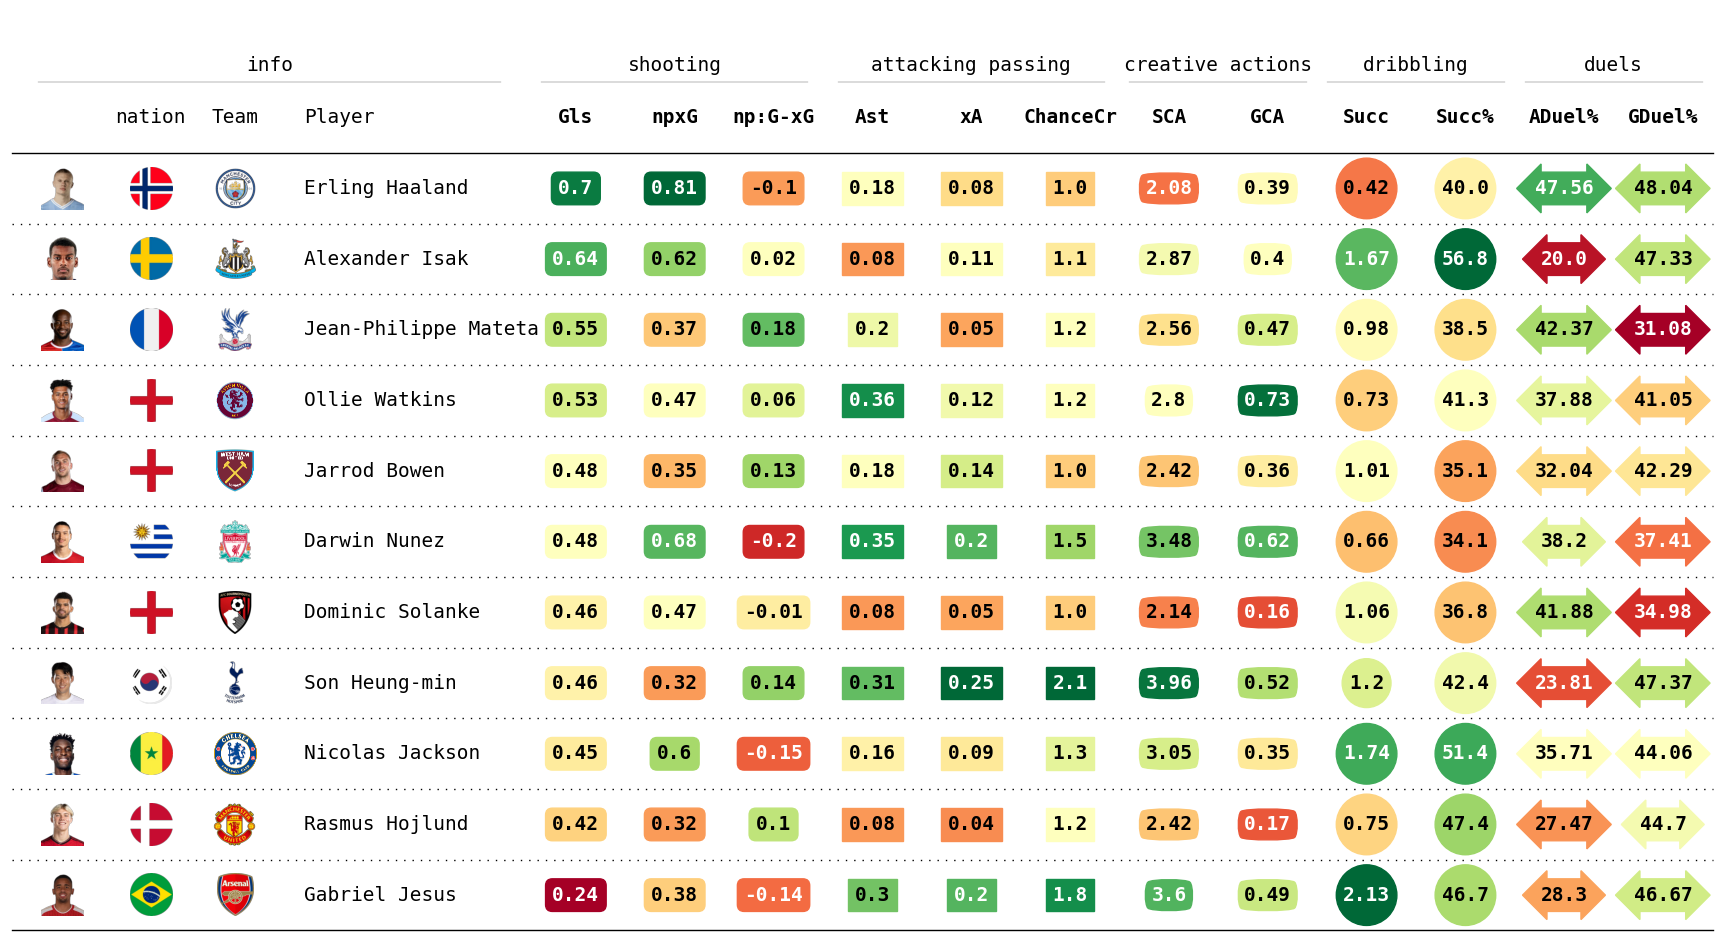

In [ ]:
# Ok lets actually create the table
fig, ax = plt.subplots(figsize=(22, 12))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    final_EPL_st,
    column_definitions=col_defs,
    index_col="profile",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=['Gls', 'npxG', 'np:G-xG', 'Ast', 'xA', 'ChanceCr', 'SCA', 'GCA', 'Succ', 'Succ%', 'ADuel%', 'GDuel%']) # This will set the font color of the columns based on the cmap so the text is readable

fig.show()

In [ ]:
fig.savefig(
    "/content/drive/MyDrive/Sport_analytics/Football/Pictures/ST/EPL_ST.png",
    facecolor=ax.get_facecolor(),
    dpi=600,
    bbox_inches="tight",
)